# Singular Value Decomposition (SVD)
---
Implementation and Application

In [60]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from scipy import linalg

The SVD has a very nice property that it always exists for any matrix whiles, the eigen decomposition exists only for square matrices with the additional constraint that the matrix formed by its eigen vectors must be invertible.

For a rectangular matrix $A^{mxn}$, the full form of its SVD is given by: 

![svd formula, source: Math of ML book](images/svd.png)

Where:   
* $\Sigma$ is a diagonal matrix whose diagonal entries are referred to as the **singular values**.<br>
* Vectors in $U$ are called the right singular vectors and
* Vectors in $V^T$ are called the left singular vecors

Scipy provides an implementation of SVD but in the following, we're going to show how the SVD is constructed. 

To get a basis for comparison, we'll use Scipy to find the SVD of a matrix and then proceed to build our own implementation.

### SVD with Scipy

In [3]:
A = np.array([[1, -0.8], [0, 1], [1, 0]])
A

array([[ 1. , -0.8],
       [ 0. ,  1. ],
       [ 1. ,  0. ]])

In [14]:
m, n = A.shape
m, n

(3, 2)

In [4]:
u, s, v_t = linalg.svd(A)

Compare shapes with image above to see if they tally. Scipy does not return the $\Sigma$ as a diagonal matrix as that would take a lot of unnecessary space. It returns an array of the elements of the diagonal (ie. the singular values).

In [7]:
u.shape, s.shape, v_t.shape

((3, 3), (2,), (2, 2))

In [8]:
u

array([[-7.88170109e-01,  1.66533454e-16, -6.15457455e-01],
       [ 3.84473224e-01, -7.80868809e-01, -4.92365964e-01],
       [-4.80591530e-01, -6.24695048e-01,  6.15457455e-01]])

In [10]:
s

array([1.62480768, 1.        ])

In [11]:
v_t

array([[-0.78086881,  0.62469505],
       [-0.62469505, -0.78086881]])

Since, the SVD is a decomposition (or factorization), we can multiply the factors to get our matrix back. But remember that $\Sigma$ is not a provided as a diagonal matrix so we have to turn it into one

In [33]:
s_diag = np.zeros((m, n), dtype='complex')
for i in range(len(s)):
    s_diag[i, i] = s[i]
s_diag

array([[1.62480768+0.j, 0.        +0.j],
       [0.        +0.j, 1.        +0.j],
       [0.        +0.j, 0.        +0.j]])

In [34]:
# reconstruced A
r_A = (u @ (s_diag @ v_t)).astype('float')
r_A.round(2)

/home/kay/anaconda3/envs/fastai2/lib/python3.7/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


array([[ 1. , -0.8],
       [ 0. ,  1. ],
       [ 1. ,  0. ]])

## Construct SVD from scratch

The following are the necessary steps to construct the SVD of a matrix `A`.

- Find the eigen vectors and eigen values of $A^TA$. Since $A^TA$ is a symmetric matrix, the eigen vectors form a basis in ${\rm I\!R^n}$
- The eigen vectors of $A^TA$ are the right singular vectors $v_i$ of the SVD of $A$
- The eigen values of $A^TA$ are the squared singular values of $\Sigma$
- The normalized images of the right singular vectors $Av_i$ are the left singular vectors $u_i$

### Step 1: Find the eigen vectors and eigen values of  $A^TA$

In [21]:
a_t_a = A.transpose() @ A
a_t_a.shape

(2, 2)

In [26]:
eig_vals, eig_vec = linalg.eig(a_t_a)

In [27]:
eig_vals

array([2.64+0.j, 1.  +0.j])

In [28]:
eig_vec

array([[ 0.78086881,  0.62469505],
       [-0.62469505,  0.78086881]])

### Step 2: The eigen vectors of $A^TA$ are the right singular vectors 𝑣𝑖  

In [31]:
est_v = eig_vec # estimated V
est_v_t = eig_vec.transpose()
est_v_t

array([[ 0.78086881, -0.62469505],
       [ 0.62469505,  0.78086881]])

### Step 3: The eigen values of $A^TA$ are the squared singular values of $\Sigma$

In [32]:
est_s = np.sqrt(eig_vals)
est_s

array([1.62480768+0.j, 1.        +0.j])

Construct a diagonal matrix from the singular values

In [35]:
sigma = np.zeros((m,n), dtype='complex')

In [36]:
for i in range(len(est_s)):
    sigma[i, i] = est_s[i]
sigma

array([[1.62480768+0.j, 0.        +0.j],
       [0.        +0.j, 1.        +0.j],
       [0.        +0.j, 0.        +0.j]])

### Step 4: The normalized images of the right singular vectors $Av_i$ are the left singular vectors $u_i$

In [41]:
est_u = np.zeros((m,m), dtype='complex')

In [42]:
for i in range(min(m, n)):
    est_u[:, i] = (1/est_s[i]) * (A @ est_v[:, i])

In [43]:
est_u

array([[ 0.78817011+0.j,  0.        +0.j,  0.        +0.j],
       [-0.38447322+0.j,  0.78086881+0.j,  0.        +0.j],
       [ 0.48059153+0.j,  0.62469505+0.j,  0.        +0.j]])

### Reconstruct A with our formulation

In [44]:
rec_A = (u @ (sigma @ est_v_t)).astype('float')
rec_A.round(2)

/home/kay/anaconda3/envs/fastai2/lib/python3.7/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


array([[ 1. , -0.8],
       [-0. ,  1. ],
       [ 1. , -0. ]])

We see that we get back an accurate reconstruction with the exception of the negative signs on the zeros

## Application
---
Data Compression

![matrix approximation](images/approx.png)

To make it more interesting, we demonstrate it on image

In [113]:
import PIL.Image as im

In [62]:
# open and convert the image to grayscale for simplicity
img = im.open('images/bk.jpg').convert('1')

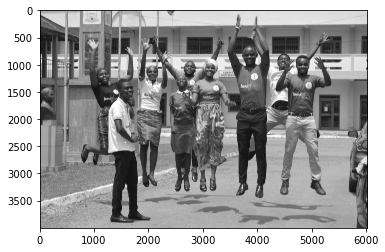

In [72]:
plt.imshow(img);

In [75]:
img_arr = np.array(img)
img_arr.shape

(4000, 6016)

In [87]:
u, s, v_t = linalg.svd(img_arr)
u.shape, s.shape, v_t.shape

((4000, 4000), (4000,), (6016, 6016))

In [133]:
s = s.astype('float')

**Rank 1 approximation**

In [88]:
s[0]

2610.929

In [89]:
r1 = s[0] * np.outer(u[:,0], v_t[:,0])
r1.shape

(4000, 6016)

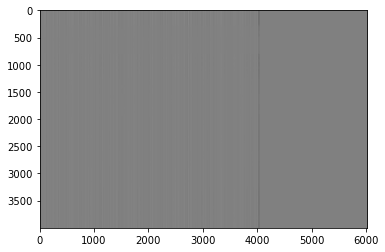

In [99]:
plt.imshow(r1, cmap='Greys');

**Rank 5 approximation**

In [110]:
r5 = np.zeros_like(img_arr).astype('float')
r5.shape

(4000, 6016)

In [145]:
for i in range(1000, 2000):
    r5 += s[i] * np.outer(u[:,i], v_t[:,i])

In [106]:
from matplotlib import cm

In [146]:
ia = im.fromarray(np.uint8(cm.gist_earth(r5)*255))

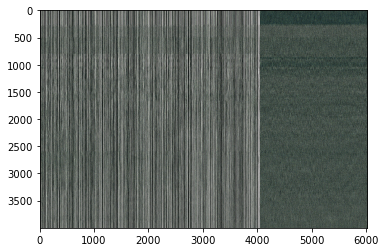

In [147]:
plt.imshow(ia, cmap='Greys')

In [117]:
sigma = np.zeros_like(img_arr).astype('complex')
for i in range(len(s)):
    sigma[i, i] = s[i]

In [118]:
sigma.shape

(4000, 6016)

In [120]:
a_c = u @ (sigma @ v_t)

In [122]:
ia = im.fromarray(np.uint8(cm.gist_earth(a_c.astype('float'))*255))

/home/kay/anaconda3/envs/fastai2/lib/python3.7/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


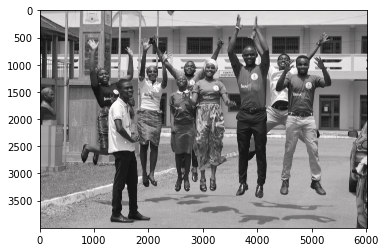

In [123]:
plt.imshow(ia)